# SLU03-Visualization with Pandas & Matplotlib: Exercise notebook

In this notebook you will practice the following:

- Scatterplots
- Line charts
- Bar charts
- Histograms
- Box plots
- Scaling plots

To learn about data visualization, we are going to use a modified version of [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) which has information about movies

The dataset is located at `data/movies.csv`, and has the following fields

```
    budget: Movie budget (in $).
    genre: Genre the movie belongs to.
    original_language: Language the movie was originally filmed in.
    production_company: Name of the production company.
    production_country: Country where the movie was produced.
    release_year: Year the movie was released.
    revenue: Movie ticket sales (in $).
    runtime: Movie duration (in minutes).
    title: Movie title.
    vote_average: Average rating in MovieLens.
    vote_count: Number of votes in MovieLens.
    release_year: Year the movie was released
```

In [25]:
import pandas as pd
import numpy as np

In [26]:
movies = pd.read_csv("data/movies.csv")

In [27]:
movies.shape

(756, 11)

In [28]:
movies.head()

,budget,genre,original_language,production_company,production_country,revenue,runtime,title,vote_average,vote_count,release_year
0,3500000.0,Comedy,en,New Line Cinema,United States of America,28215918.0,91.0,Friday,7.0,513.0,1995.0
1,12000000.0,Comedy,en,Universal Pictures,United States of America,41205099.0,92.0,Happy Gilmore,6.5,767.0,1996.0
2,31000000.0,Comedy,en,United Artists,United States of America,185260553.0,117.0,The Birdcage,6.7,303.0,1996.0
3,52000000.0,Drama,en,Imagine Entertainment,United States of America,355237933.0,140.0,Apollo 13,7.3,1637.0,1995.0
4,2000000.0,Comedy,en,Miramax Films,United States of America,1275000.0,83.0,Blue in the Face,6.8,28.0,1995.0


### Ex1. Import matplotlib, pyplot and the matplotlib inline magic.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
assert plt, "Did you import module pyplot from matplotlib and called it plt?"

Change the default chart size to 8 inches width and 8 inches height

In [31]:
plt.rcParams["figure.figsize"] = [8,8]

In [32]:
assert plt.rcParams["figure.figsize"][0] == 8, "Did you change the default figure sizes?"
assert plt.rcParams["figure.figsize"][1] == 8, "Did you change the default figure sizes?"

<hr>

### Note about the grading

Grading plots is difficult, we are using `plotchecker` to grade the plots with nbgrader. 
For `plotchecker` to work with nbgrader, we need to add on each cell, the line

`axis = plt.gca();`

<div class="alert alert-danger">
<b>NOTE:</b>If you get the ImportError, plotchecker not defined, make sure you activate the right environment for this unit!
</div>

**After the code required to do the plot**.

For example, if we want to plot a scatter plot showing the relationship between budget and vote average we would do as follows:

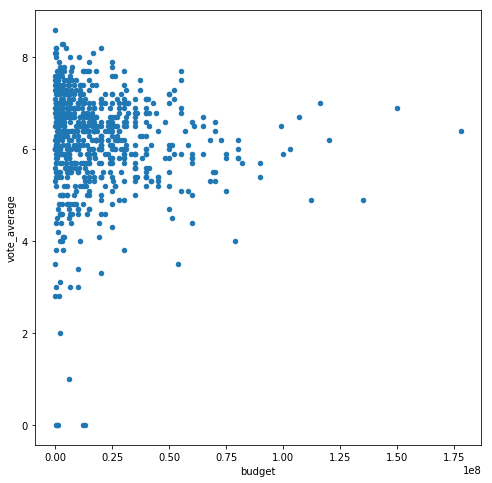

In [33]:
# code required to plot
movies.plot.scatter(x="budget",y="vote_average" )

# last line in the cell required to "capture" the cell and being able to grade it with nbgrader
axis = plt.gca();

---
### Ex2. How does the budget correlate with the revenue?

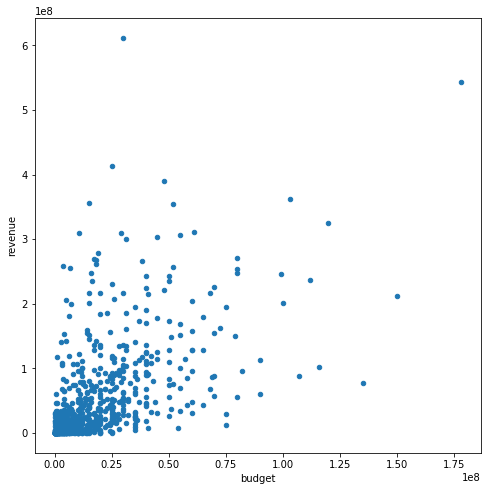

In [34]:
movies.plot.scatter(x="budget", y="revenue")
axis = plt.gca();

In [36]:
from plotchecker import PlotChecker
def get_data(p, ax=0):
    """
    Parses the plotchecker object to get the relevant data for evaluation.
    """
    all_x_data = []
    lines = p.axis.get_lines()
    collections = axis.collections
    if len(lines) > 0:
        all_x_data.append(np.concatenate([x.get_xydata()[:, ax] for x in lines]))
    if len(collections) > 0:
        all_x_data.append(np.concatenate([x.get_offsets()[:, ax] for x in collections]))
    return np.concatenate(all_x_data, axis=0)

pc = PlotChecker(axis)
data = get_data(pc)
assert len(data) == 756, "Did you set the right variables for the plot axes?"
assert set([pc.xlabel] + [pc.ylabel]) == set(["budget", "revenue"]), "Did you set the right variables for the plot axes?"
np.testing.assert_equal(get_data(pc,1), movies.revenue)
print("Success!")

AssertionError: Did you set the right variables for the plot axes?

---
### Ex3. How does the average vote count of movies evolves over time? Set the plot title to "Average movie vote count by year" 

To calculate the average vote_count by year we need to perform an [aggregation](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), pandas support this by doing a technique called [Split-Apply-Combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). This will be explained in the Data Wrangling Specialization.

For now we will do the grouping for you:

In [42]:
avg_vote_count_by_year = movies.groupby("release_year")["vote_count"].mean().reset_index()
avg_vote_count_by_year.columns = ["release_year", "avg_vote_count"]
avg_vote_count_by_year.head()

,release_year,avg_vote_count
0,1951.0,140.0
1,1952.0,343.0
2,1953.0,30.0
3,1955.0,163.0
4,1956.0,26.5


<div class="alert alert-danger">
<b>NOTE:</b>Make sure you use the dataframe named avg_vote_count_by_year for the next exercise
</div>

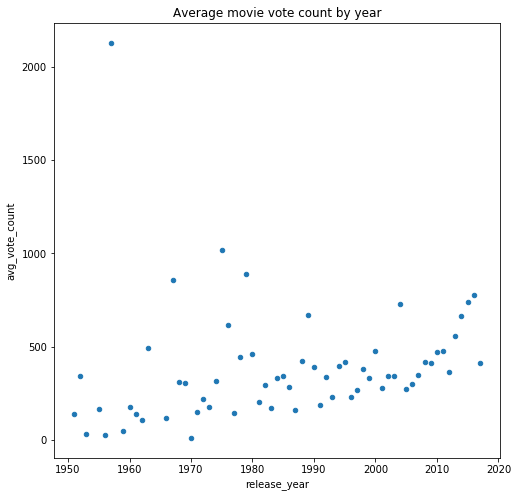

In [55]:
avg_vote_count_by_year.plot.scatter(x='release_year', y='avg_vote_count')
plt.title('Average movie vote count by year')
axis = plt.gca();

In [56]:
pc = PlotChecker(axis)
np.testing.assert_equal(get_data(pc), sorted(movies[movies.runtime.notnull()].release_year.unique()))
np.testing.assert_equal(get_data(pc, ax=1), movies.groupby("release_year")["vote_count"].mean())

assert set([pc.xlabel] + [pc.ylabel]) == set(["release_year", "avg_vote_count"]), "Did you set the right variables for the plot axes?"
pc.assert_title_equal("Average movie vote count by year")
print("Success!")

Success!


---
### Ex4 How does the median runtime vary by movie genre? Label the x-axis as "Median Runtime"

Again, we will do the grouping for you:

In [57]:
median_runtime_by_genre = movies.groupby("genre")["runtime"].median().reset_index()
median_runtime_by_genre.columns = ["genre", "median_runtime"]
median_runtime_by_genre

,genre,median_runtime
0,Action,108.5
1,Adventure,107.0
2,Animation,84.0
3,Comedy,98.0
4,Crime,70.0
5,Documentary,98.5
6,Drama,115.0
7,Fantasy,105.5
8,Horror,92.0
9,Music,101.5


<div class="alert alert-danger">
<b>NOTE:</b>Make sure you use the dataframe named median_runtime_by_genre for the next exercise
</div>

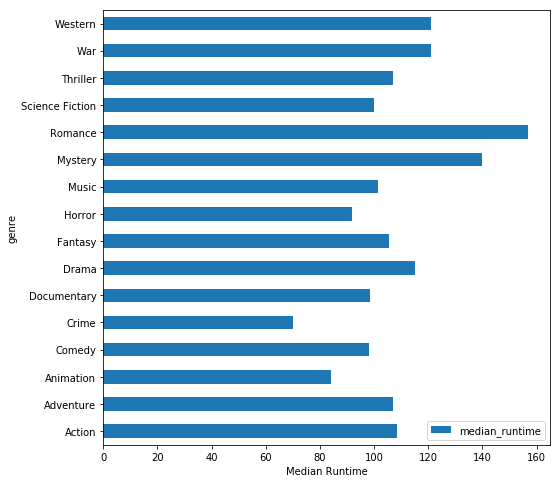

In [70]:
median_runtime_by_genre.plot.barh(x='genre', y='median_runtime')
plt.xlabel('Median Runtime')
axis = plt.gca();

In [71]:
pc = PlotChecker(axis)
pc._patches = np.array(pc.axis.patches)
pc._patches = pc._patches[np.argsort([p.get_x() for p in pc._patches])]
pc.widths = np.array([p.get_width() for p in pc._patches])
pc.heights = np.array([p.get_height() for p in pc._patches])
assert len(pc._patches) == len(movies.groupby("genre").groups), "Did you set the right categorical variable and the right plot type?"
np.testing.assert_equal(pc.widths, movies.groupby("genre")["runtime"].median().values)
pc.assert_xlabel_equal("Median Runtime")
print("Success!")

Success!


---
### Ex5. How is the variable `runtime` distributed? Show only movies with a maximum runtime of 3 hours (by changing the plot's xaxis, not by subsetting the dataset), and change the number of bins to 30. Change the bar color to `red`.

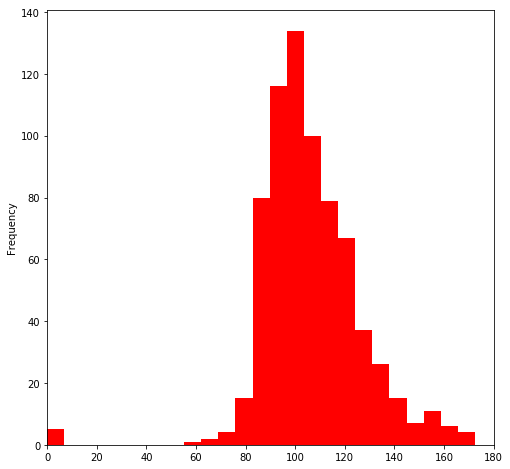

In [77]:
movies.runtime.plot.hist(xlim=(0,180), bins=30, color='r')
axis = plt.gca();

In [78]:
pc = PlotChecker(axis)
pc._patches = np.array(pc.axis.patches)
pc._patches = pc._patches[np.argsort([p.get_x() for p in pc._patches])]
pc.widths = np.array([p.get_width() for p in pc._patches])
pc.heights = np.array([p.get_height() for p in pc._patches])

np.testing.assert_allclose(pc.heights, [  5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   4.,
        15.,  80., 116., 134., 100.,  79.,  67.,  37.,  26.,  15.,   7.,
        11.,   6.,   4.,   0.,   0.,   1.,   0.,   1.])
np.testing.assert_allclose(pc.widths, [6.9 for i in range(len(pc.widths))])
assert pc.xlim[1] == 180, "Did you read the data dictionary?"
assert pc._patches[0].get_facecolor() == (1., 0., 0., 1.), "Did you change the plot color?"
print("Success!")

Success!


---
### Ex6. Change the default plot style to `seaborn`. Make a plot that displays the budget broken by movie language and that allows us to check if there are outliers.

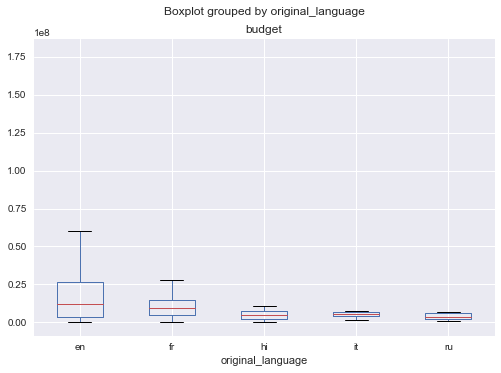

In [82]:
plt.style.use('seaborn')
movies.boxplot('budget', by='original_language')
axis = plt.gca();

In [83]:
pc = PlotChecker(axis)
pc._lines = pc.axis.get_lines()
pc.colors = np.array([pc._color2rgb(x.get_color()) for x in pc._lines])
np.testing.assert_allclose(pc.colors[0],[0.29803922, 0.44705882, 0.69019608])
np.testing.assert_allclose(pc.yticks,np.array([-2.50,0,2.5,5,7.5,10,12.5,15,17.5,20])*1e7)
assert pc.xticklabels == ['en', 'fr', 'hi', 'it', 'ru'], "Did you select the right categorical variable for the plot?"
print("Success!")

Success!



# Ungraded Exercise
Load the file misterious_data.csv and use data visualization to answer the following questions:

* How is the distribution of x in general?
* Are there any outlier in any of the fields?
* Which 2 charts better represent the underlying data?. Change their style to `bmh` and add titles to each chart explaining them 
